# Лабораторная работа №7. 
## Логинов Сергей
### Вариант 4

1. Считаем заданный набор данных из репозитария UCI

In [1]:
import pandas as pd
import numpy as np
url = \
"https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
data_set = pd.read_csv( url, header=None )
data_set = data_set.replace('?',np.NaN)
data_set
data_set[1] = data_set[1].astype('float64', copy=False)
for i in range(18, 26):
    data_set[i] = data_set[i].astype('float64', copy=False)
titles = {
    1 : "symboling",
    2 : "normalized-losses",
    3 : "make",
    4 : "aspiration",
    5 : "num-of-doors",
    6 : "body-style",
    7 : "symboling",
    8 : "drive-wheels",
    9 : "engine-location",
    10 : "wheel-base",
    11 : "length",
    12 : "width",
    13 : "height",
    14 : "curb-weight",
    15 : "engine-type",
    16 : "num-of-cylinders",
    17 : "engine-size",
    18 : "fuel-system",
    19 : "bore",
    20 : "stroke",
    21 : "compression-ratio",
    22 : "horsepower",
    23 : "peak-rpm",
    24 : "city-mpg",
    25 : "highway-mpg",
    26 : "price",
}
data_set

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


2. Произведем препроцессинг данных

In [2]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data_setX = data_set.loc[:, 1:]
data_setY = data_set[0]
for i in data_setX:
    if data_setX[i].dtype == "object":
        data_setX[i] = lb_make.fit_transform(data_setX[i])
    else:
        data_setX[i] = data_setX[i].fillna(data_setX[i].median());
data_setX

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,115.0,0,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,115.0,0,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,115.0,0,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,1,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,1,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,21,1,0,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,21,1,1,0,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,21,1,0,0,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,21,0,1,0,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


3.  Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определим и оставим в наборе наиболее важные признаки (я оставил 7 признаков).

In [3]:
X = data_setX.values
y = data_setY.values
n_features = 9

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
z = model.feature_importances_
z_s = sorted(z)[-n_features:]
z_s

[0.047924461318993694,
 0.052033865508015226,
 0.05323898609373501,
 0.05661543609873136,
 0.059603500223753124,
 0.06996431860750811,
 0.07573999390924623,
 0.07597495120354576,
 0.07865920699104104]

In [5]:
indexes = []
max_indexes = []
for i in range(len(z)):
    if z[i] in z_s[-n_features:-2]:
        indexes.append(i+1)
    if z[i] in z_s[-2:]:
        max_indexes.append(i+1)
data_setX = data_setX.loc[:][indexes + max_indexes]
data_setX.columns = [i for i in range(n_features)]
max_indexes_title = [titles[max_indexes[0] + 1], titles[max_indexes[1] + 1]]
data_setX

,0,1,2,3,4,5,6,7,8
0,0,0,88.6,168.8,64.1,48.8,3.47,115.0,1
1,0,0,88.6,168.8,64.1,48.8,3.47,115.0,1
2,0,2,94.5,171.2,65.5,52.4,2.68,115.0,1
3,1,3,99.8,176.6,66.2,54.3,3.19,164.0,0
4,1,3,99.4,176.6,66.4,54.3,3.19,164.0,0
...,...,...,...,...,...,...,...,...,...
200,21,3,109.1,188.8,68.9,55.5,3.78,95.0,0
201,21,3,109.1,188.8,68.8,55.5,3.78,95.0,0
202,21,3,109.1,188.8,68.9,55.5,3.58,95.0,0
203,21,3,109.1,188.8,68.9,55.5,3.01,95.0,0


In [6]:
indexes = [i for i in range(len(data_setX.columns) - 2)]
max_indexes = [i for i in range(len(data_setX.columns) - 2,len(data_setX.columns))]
x_plot = data_setX.loc[:][max_indexes].values

4. Разделим данные на тестовые и обущающие

In [7]:
from sklearn.model_selection import train_test_split
X = data_setX.values
y = data_setY.values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

5. Создадим и обучим классификатор на основе деревьев решений с глубиной дерева 5, определим точность классификации и визуализируем границу принятия решений и построим дерево решений. При визуализации границы принятия решений использовали 2 наиболее важных признака

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train);

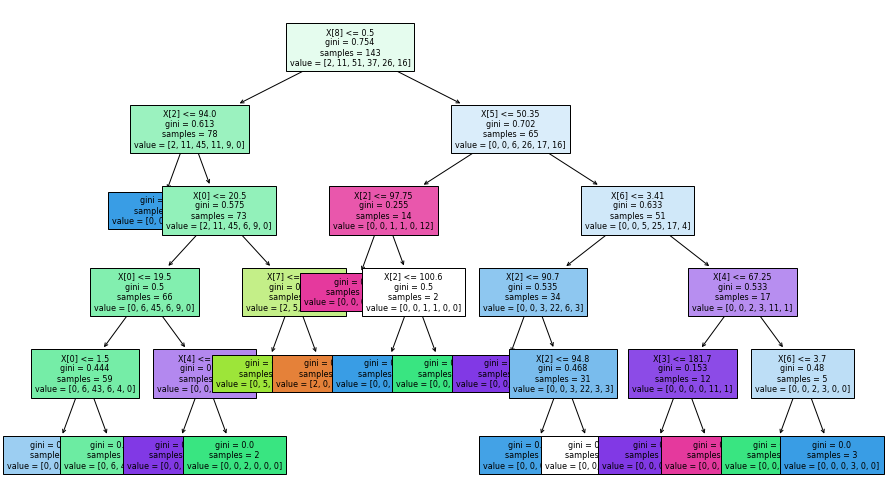

In [9]:
plt.figure(figsize=(15, 9))
plot_tree(dt_clf, filled=True, fontsize=8);

In [10]:
dt_clf.score(X_test,y_test)

0.5806451612903226

In [11]:
from math import floor
def helper(x0, l):
    z  = np.repeat(x0, floor(l / len(x0)))
    while len(z) < l:
        z = np.append(z, z[-1])
    return z.ravel()
    
def plot_decision_boundary(model, X_data, X_test_data, text):
    max_indexes = X_data.columns[-2:]
    another_indexes = X_data.columns[:-2]
    x1 = np.amin(X_data[max_indexes[0]], axis=0)
    x2 = np.amax(X_data[max_indexes[0]], axis=0)
    y1 = np.amin(X_data[max_indexes[1]], axis=0)
    y2 = np.amax(X_data[max_indexes[1]], axis=0)
    axis = [x1,x2,y1,y2]
    x_max1, x_max2 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x_max1.ravel(), x_max2.ravel()]
    l = len(X_new[:, 0])
    
    tmp = [helper(X_test_data[i], l) for i in range(len(another_indexes))]
    X_new = tmp[0]
    for i in range(1, len(tmp)):
        X_new = np.c_[X_new, tmp[i]]
    
    X_new = np.c_[X_new, x_max1.ravel(), x_max2.ravel()]
    y_predict = model.predict(X_new)
    
    zz = y_predict.reshape(x_max1.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9', '#9B59B6','#2471A3','#148F77', '#D4AC0D','#A04000'])
    plt.contourf(x_max1, x_max2, zz, cmap=custom_cmap)
    plt.xlabel(text[0])
    plt.ylabel(text[1]) 

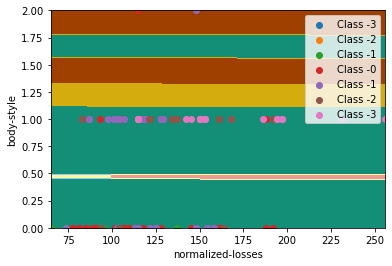

In [12]:
plot_decision_boundary(dt_clf, data_setX, X_train, max_indexes_title)
plt.scatter(x_plot[y==-3,0], x_plot[y==-3,1], label='Class -3')
plt.scatter(x_plot[y==-2,0], x_plot[y==-2,1], label='Class -2')
plt.scatter(x_plot[y==-1,0], x_plot[y==-1,1], label='Class -1')
plt.scatter(x_plot[y==0,0], x_plot[y==0,1], label='Class -0')
plt.scatter(x_plot[y==1,0], x_plot[y==1,1], label='Class -1')
plt.scatter(x_plot[y==2,0], x_plot[y==2,1], label='Class -2')
plt.scatter(x_plot[y==3,0], x_plot[y==3,1], label='Class -3')
plt.legend()
plt.show()

6. Построим на основе классификатора деревьев решений ансамблевые классификаторы

In [13]:
class_scores = {}

In [14]:
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=50, max_samples=100,
                           bootstrap=True)
bagging_clf.fit(X_train, y_train)
class_scores["BaggingClassifier"] = bagging_clf.score(X_test, y_test)


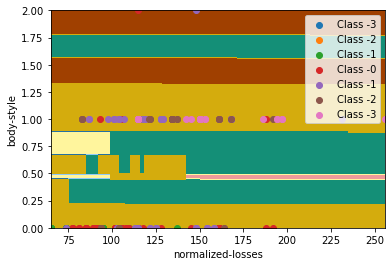

In [15]:
plot_decision_boundary(bagging_clf, data_setX, X_train, max_indexes_title)
plt.scatter(x_plot[y==-3,0], x_plot[y==-3,1], label='Class -3')
plt.scatter(x_plot[y==-2,0], x_plot[y==-2,1], label='Class -2')
plt.scatter(x_plot[y==-1,0], x_plot[y==-1,1], label='Class -1')
plt.scatter(x_plot[y==0,0], x_plot[y==0,1], label='Class -0')
plt.scatter(x_plot[y==1,0], x_plot[y==1,1], label='Class -1')
plt.scatter(x_plot[y==2,0], x_plot[y==2,1], label='Class -2')
plt.scatter(x_plot[y==3,0], x_plot[y==3,1], label='Class -3')
plt.legend()
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50, oob_score=True, 
                                random_state=666, n_jobs=-1)
rf_clf.fit(X, y);
class_scores["RandomForestClassifier"] = rf_clf.oob_score_

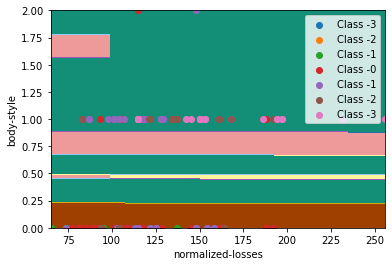

In [17]:
plot_decision_boundary(rf_clf, data_setX, X_train, max_indexes_title)
plt.scatter(x_plot[y==-3,0], x_plot[y==-3,1], label='Class -3')
plt.scatter(x_plot[y==-2,0], x_plot[y==-2,1], label='Class -2')
plt.scatter(x_plot[y==-1,0], x_plot[y==-1,1], label='Class -1')
plt.scatter(x_plot[y==0,0], x_plot[y==0,1], label='Class -0')
plt.scatter(x_plot[y==1,0], x_plot[y==1,1], label='Class -1')
plt.scatter(x_plot[y==2,0], x_plot[y==2,1], label='Class -2')
plt.scatter(x_plot[y==3,0], x_plot[y==3,1], label='Class -3')
plt.legend()
plt.show()

In [18]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), n_estimators=50)
ada_clf.fit(X_train, y_train)
class_scores["AdaBoostClassifier"] = ada_clf.score(X_test, y_test)

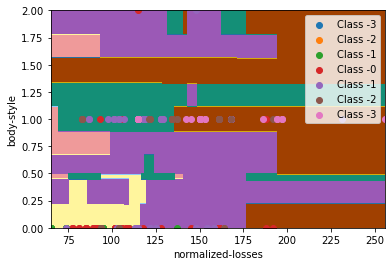

In [19]:
plot_decision_boundary(ada_clf, data_setX, X_train, max_indexes_title)
plt.scatter(x_plot[y==-3,0], x_plot[y==-3,1], label='Class -3')
plt.scatter(x_plot[y==-2,0], x_plot[y==-2,1], label='Class -2')
plt.scatter(x_plot[y==-1,0], x_plot[y==-1,1], label='Class -1')
plt.scatter(x_plot[y==0,0], x_plot[y==0,1], label='Class -0')
plt.scatter(x_plot[y==1,0], x_plot[y==1,1], label='Class -1')
plt.scatter(x_plot[y==2,0], x_plot[y==2,1], label='Class -2')
plt.scatter(x_plot[y==3,0], x_plot[y==3,1], label='Class -3')
plt.legend()
plt.show()

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=5, n_estimators=50)
gb_clf.fit(X_train, y_train)
class_scores["GradientBoostingClassifier"] = gb_clf.score(X_test, y_test)

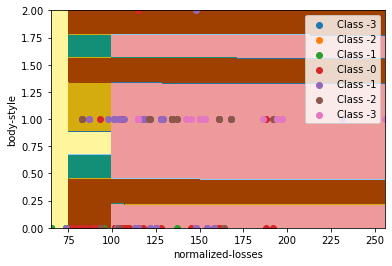

In [21]:
plot_decision_boundary(gb_clf, data_setX, X_train, max_indexes_title)
plt.scatter(x_plot[y==-3,0], x_plot[y==-3,1], label='Class -3')
plt.scatter(x_plot[y==-2,0], x_plot[y==-2,1], label='Class -2')
plt.scatter(x_plot[y==-1,0], x_plot[y==-1,1], label='Class -1')
plt.scatter(x_plot[y==0,0], x_plot[y==0,1], label='Class -0')
plt.scatter(x_plot[y==1,0], x_plot[y==1,1], label='Class -1')
plt.scatter(x_plot[y==2,0], x_plot[y==2,1], label='Class -2')
plt.scatter(x_plot[y==3,0], x_plot[y==3,1], label='Class -3')
plt.legend()
plt.show()

7. Определим лучший классификатор, дающий наиболее высокую точность классификации.

In [22]:
max_elem = max(class_scores, key=class_scores.get)
print("Лучший классификатор, дающий наиболее высокую точность классификации: {}({})".format(max_elem, class_scores[max_elem]))

Лучший классификатор, дающий наиболее высокую точность классификации: RandomForestClassifier(0.848780487804878)
